1)Perform a linear regression to predict the medal count in 2008 and 2012 (separately, in two regressions) from Population and GDP and report your results.

In [12]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.stats
import matplotlib.pyplot as plt
# load data from csv file
data = pd.read_csv(r"C:\Users\hughd\Desktop\machine learning\medals.csv")

# separate data for 2008 and 2012
data_2008 = data[['Population', 'GDP', 'Medal2008']]
data_2012 = data[['Population', 'GDP', 'Medal2012']]

# define the linear regression function
def lin_reg(X, a, b, c):
    return a*X[:,0]+b*X[:,1]+c

def log_like(num, X, y, func):
    y_predict=func(X,*num)
    n=len(y)
    s2=np.sum((y-y_predict)**2)/n
    ll =-n/2*np.log(2*np.pi*s2)-np.sum((y-y_predict)**2)/(2*s2)
    return -ll

# perform linear regression for 2008
X_2008 = np.array(data_2008[['Population', 'GDP']])
Y_2008 = np.array(data_2008['Medal2008'])
p0_2008 = [0, 0, 1]
result_2008 = minimize(log_like, p0_2008, args=(X_2008, Y_2008, lin_reg))
medal_count_2008 = lin_reg(X_2008, *result_2008.x)

# perform linear regression for 2012
X_2012 = np.array(data_2012[['Population', 'GDP']])
Y_2012 = np.array(data_2012['Medal2012'])
normal_2012 = [0, 0, 1]
result_2012 = minimize(log_like, normal_2012, args=(X_2012, Y_2012, lin_reg))
medal_count_2012 = lin_reg(X_2012, *result_2012.x)

# format and print results
print('Medal count prediction for 2008:')
for i in range(len(data_2008)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2008[i])
    print(f'{country}: {medal_count}')


print('\nMedal count prediction for 2012:')
for i in range(len(data_2012)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2012[i])
    print(f'{country}: {medal_count}')



Medal count prediction for 2008:
Algeria: 7
Argentina: 10
Armenia: 6
Australia: 17
Azerbaijan: 7
Bahamas: 6
Bahrain: 6
Belarus: 6
Belgium: 10
Brazil: 26
Bulgaria: 6
Canada: 20
China: 62
Colombia: 9
Croatia: 7
Cuba: 6
Czech Republic: 8
Denmark: 9
Dominican Republic: 6
Egypt: 8
Estonia: 6
Ethiopia: 6
Finland: 8
France: 28
Georgia: 6
Germany: 34
Great Britain: 25
Greece: 8
Hungary: 7
India: 19
Indonesia: 12
Iran: 7
Ireland: 8
Italy: 23
Jamaica: 6
Japan: 53
Kazakhstan: 7
Kenya: 6
Lithuania: 6
Malaysia: 8
Mexico: 15
Moldova: 6
Mongolia: 6
Morocco: 7
Netherlands: 13
New Zealand: 7
North Korea: 6
Norway: 10
Poland: 10
Portugal: 8
Romania: 7
Russian Federation: 21
Serbia: 6
Singapore: 8
Slovakia: 7
Slovenia: 6
South Africa: 9
South Korea: 15
Spain: 18
Sweden: 10
Switzerland: 11
Taiwan: 10
Tajikistan: 6
Thailand: 9
Trinidad and Tobago: 6
Tunisia: 6
Turkey: 12
Ukraine: 7
United States: 126
Uzbekistan: 6
Venezuela: 9

Medal count prediction for 2012:
Algeria: 8
Argentina: 10
Armenia: 7
Australia:

2)How consistent are the effects of Population and GDP over time?

In [13]:
import scipy
from scipy import optimize
import scipy.integrate as integrate

start_guess = [0,0,1]
mle_result_2008 = optimize.fmin(log_like, start_guess, args=(X_2008, Y_2008, lin_reg))
mle_result_2012 = optimize.fmin(log_like, start_guess, args=(X_2012, Y_2012, lin_reg))
alpha=0.05
t_critical=scipy.stats.norm.ppf(1 - alpha / 2)

mu_2008 = mle_result_2008[0]
sigma_2008 = mle_result_2008[1]
mu_2012 = mle_result_2012[0]
sigma_2012 = mle_result_2012[1]

a_2008 = mle_result_2008[0]-t_critical*mle_result_2008[1]
b_2008 = mle_result_2008[0]+t_critical*mle_result_2008[1]

a_2012 = mle_result_2012[0]-t_critical*mle_result_2012[1]
b_2012 = mle_result_2012[0]+t_critical*mle_result_2012[1]


x_range_2008 = np.linspace(mu_2008 - 3*sigma_2008, mu_2008 + 3*sigma_2008, 100)
x_range_2012 = np.linspace(mu_2012 - 3*sigma_2012, mu_2012 + 3*sigma_2012, 100)

pdf_2008 = scipy.stats.norm.pdf(x_range_2008, mu_2008, sigma_2008)
pdf_2012 = scipy.stats.norm.pdf(x_range_2012, mu_2012, sigma_2012)

con_2008 = integrate.simps(pdf_2008, x_range_2008)
con_2012 = integrate.simps(pdf_2012, x_range_2012)


print(con_2008)
print(con_2012)
"confidence interval is over 95% for both years, therefore values are consistent over time"


Optimization terminated successfully.
         Current function value: 272.858239
         Iterations: 159
         Function evaluations: 275
Optimization terminated successfully.
         Current function value: 272.593482
         Iterations: 136
         Function evaluations: 242
0.9973008953038265
0.9973008953038267


'confidence interval is over 95% for both years, therefore values are consistent over time'

3)Using the regression for the 2012 medal count make a prediction for the results of 2016.

In [14]:

import pandas as pd
import numpy as np
from scipy.optimize import minimize


# separate data for 2012 and 2016

data_2012 = data[['Population', 'GDP', 'Medal2012']]
data_2016 = data[['Population', 'GDP', 'Medal2016']]

# perform linear regression for 2012
X_2016 = np.array(data_2012[['Population', 'GDP']])
Y_2016 = np.array(medal_count_2012)
normal_2016 = [0, 0, 1]
result_2016 = minimize(log_like, normal_2016, args=(X_2016, Y_2016, lin_reg))
medal_count_2016 = lin_reg(X_2016, *result_2016.x)



# format and print results
print('\nMedal count prediction for 2016:')
for i in range(len(data_2012)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2016[i])
    print(f'{country}: {medal_count}')






Medal count prediction for 2016:
Algeria: 8
Argentina: 10
Armenia: 7
Australia: 18
Azerbaijan: 7
Bahamas: 7
Bahrain: 7
Belarus: 7
Belgium: 11
Brazil: 25
Bulgaria: 7
Canada: 21
China: 48
Colombia: 9
Croatia: 7
Cuba: 7
Czech Republic: 8
Denmark: 10
Dominican Republic: 7
Egypt: 7
Estonia: 7
Ethiopia: 6
Finland: 9
France: 29
Georgia: 7
Germany: 36
Great Britain: 26
Greece: 9
Hungary: 8
India: 4
Indonesia: 10
Iran: 6
Ireland: 9
Italy: 24
Jamaica: 7
Japan: 55
Kazakhstan: 8
Kenya: 6
Lithuania: 7
Malaysia: 9
Mexico: 15
Moldova: 7
Mongolia: 7
Morocco: 7
Netherlands: 14
New Zealand: 8
North Korea: 7
Norway: 11
Poland: 11
Portugal: 9
Romania: 8
Russian Federation: 20
Serbia: 7
Singapore: 9
Slovakia: 7
Slovenia: 7
South Africa: 9
South Korea: 16
Spain: 19
Sweden: 11
Switzerland: 12
Taiwan: 10
Tajikistan: 7
Thailand: 9
Trinidad and Tobago: 7
Tunisia: 7
Turkey: 12
Ukraine: 7
United States: 130
Uzbekistan: 7
Venezuela: 9


4)Plot your predictions against the actual results of 2016. If the results are hard to see, use a transformation of the axes to make it these clearer. How good are the predictions? Which countries are outliers from the trend?

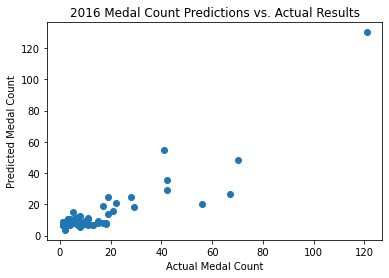

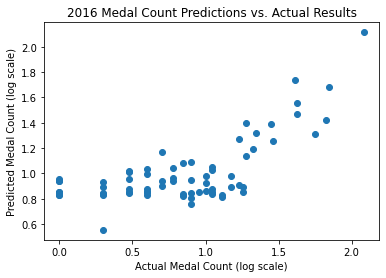

In [15]:
fig1 = plt.figure(1)
plt.scatter(data_2016['Medal2016'], medal_count_2016)
plt.xlabel('Actual Medal Count')
plt.ylabel('Predicted Medal Count')
plt.title('2016 Medal Count Predictions vs. Actual Results')


fig2 = plt.figure(2)
plt.scatter(np.log10(data_2016['Medal2016']), np.log10(medal_count_2016))
plt.xlabel('Actual Medal Count (log scale)')
plt.ylabel('Predicted Medal Count (log scale)')
plt.title('2016 Medal Count Predictions vs. Actual Results')

plt.show()

Predictions are reasonably good, as a weak correlation is shown between the two, however some deviations, such as the United States, China, and Russia are predicted to win more medals than they actually did, while countries such as Great Britain and Germany are predicted to win fewer medals than they actually did.

5)Fit linear regressions models for the total medal count in 2012 using: (i) Population alone; (ii) GDP alone; (iii) Population and GDP. Select the model that minimises the Akaike Information Criterion

In [16]:
# data for 2012
data_2012 = data[['Population', 'Medal2012']]

# define the linear regression function
def lin_reg_pop(X, a, b):
    return a*X[:,0]+b


# perform linear regression for 2012
X_2012_pop = np.array(data_2012[['Population']])
Y_2012_pop = np.array(data_2012['Medal2012'])
normal_2012_pop = [0, 1]
result_2012_pop = minimize(log_like, normal_2012_pop, args=(X_2012_pop, Y_2012_pop, lin_reg_pop))
medal_count_2012_pop = lin_reg_pop(X_2012_pop, *result_2012_pop.x)
k=2
ll = log_like(result_2012_pop.x, X_2012_pop, Y_2012_pop, lin_reg_pop)
aic_2012_pop = -(2*k - 2*ll)
print('\nMedal count prediction for 2012:')
for i in range(len(data_2012)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2012_pop[i])
    print(f'{country}: {medal_count}')
    




Medal count prediction for 2012:
Algeria: 12
Argentina: 12
Armenia: 11
Australia: 12
Azerbaijan: 11
Bahamas: 11
Bahrain: 11
Belarus: 11
Belgium: 11
Brazil: 17
Bulgaria: 11
Canada: 12
China: 54
Colombia: 12
Croatia: 11
Cuba: 11
Czech Republic: 11
Denmark: 11
Dominican Republic: 11
Egypt: 14
Estonia: 11
Ethiopia: 14
Finland: 11
France: 13
Georgia: 11
Germany: 14
Great Britain: 13
Greece: 11
Hungary: 11
India: 51
Indonesia: 19
Iran: 13
Ireland: 11
Italy: 13
Jamaica: 11
Japan: 15
Kazakhstan: 11
Kenya: 12
Lithuania: 11
Malaysia: 12
Mexico: 14
Moldova: 11
Mongolia: 11
Morocco: 12
Netherlands: 11
New Zealand: 11
North Korea: 12
Norway: 11
Poland: 12
Portugal: 11
Romania: 12
Russian Federation: 15
Serbia: 11
Singapore: 11
Slovakia: 11
Slovenia: 11
South Africa: 13
South Korea: 12
Spain: 12
Sweden: 11
Switzerland: 11
Taiwan: 12
Tajikistan: 11
Thailand: 13
Trinidad and Tobago: 11
Tunisia: 11
Turkey: 13
Ukraine: 12
United States: 21
Uzbekistan: 12
Venezuela: 12


ii)

In [17]:
def lin_reg_gdp(X, a, b):
    return a*X[:,0]+b
# separate data for 2008 and 2012
data_2012_gdp = data[['GDP', 'Medal2012']]


X_2012_gdp = np.array(data_2012_gdp[['GDP']])
Y_2012_gdp = np.array(data_2012_gdp['Medal2012'])
normal_2012_gdp = [0, 1]
result_2012_gdp = minimize(log_like, normal_2012_gdp, args=(X_2012_gdp, Y_2012_gdp, lin_reg_gdp))
medal_count_2012_gdp = lin_reg_gdp(X_2012_gdp, *result_2012_gdp.x)
k=2
ll = log_like(result_2012_gdp.x, X_2012_gdp, Y_2012_gdp, lin_reg_gdp)
aic_2012_gdp = -(2*k - 2*ll)
print('\nMedal count prediction for 2012:')
for i in range(len(data_2012)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2012_gdp[i])
    print(f'{country}: {medal_count}')



Medal count prediction for 2012:
Algeria: 8
Argentina: 10
Armenia: 6
Australia: 17
Azerbaijan: 7
Bahamas: 6
Bahrain: 6
Belarus: 7
Belgium: 10
Brazil: 26
Bulgaria: 7
Canada: 20
China: 63
Colombia: 9
Croatia: 7
Cuba: 7
Czech Republic: 8
Denmark: 9
Dominican Republic: 7
Egypt: 8
Estonia: 6
Ethiopia: 6
Finland: 8
France: 28
Georgia: 6
Germany: 34
Great Britain: 25
Greece: 9
Hungary: 7
India: 21
Indonesia: 13
Iran: 7
Ireland: 8
Italy: 23
Jamaica: 6
Japan: 52
Kazakhstan: 8
Kenya: 6
Lithuania: 7
Malaysia: 8
Mexico: 15
Moldova: 6
Mongolia: 6
Morocco: 7
Netherlands: 13
New Zealand: 7
North Korea: 6
Norway: 10
Poland: 10
Portugal: 8
Romania: 8
Russian Federation: 21
Serbia: 7
Singapore: 8
Slovakia: 7
Slovenia: 7
South Africa: 9
South Korea: 15
Spain: 18
Sweden: 10
Switzerland: 11
Taiwan: 10
Tajikistan: 6
Thailand: 9
Trinidad and Tobago: 6
Tunisia: 7
Turkey: 12
Ukraine: 8
United States: 124
Uzbekistan: 7
Venezuela: 9


iii)

In [18]:
data_2012 = data[['Population', 'GDP', 'Medal2012']]

# define the linear regression function
def lin_reg_both(X, a, b, c):
    return a*X[:,0]+b*X[:,1]+c




# perform linear regression for 2012
X_2012 = np.array(data_2012[['Population', 'GDP']])
Y_2012 = np.array(data_2012['Medal2012'])
normal_2012_both = [0, 0, 1]
result_2012_both = minimize(log_like, normal_2012_both, args=(X_2012, Y_2012, lin_reg_both))
medal_count_2012_both = lin_reg_both(X_2012, *result_2012_both.x)

ll= log_like(result_2012_both.x, X_2012, Y_2012, lin_reg_both)
k=3

aic_2012 = -(2*k - 2*ll)

print('\nMedal count prediction for 2012:')
for i in range(len(data_2012)):
    country = data.iloc[i]['Country']
    medal_count = round(medal_count_2012[i])
    print(f'{country}: {medal_count}')
    



Medal count prediction for 2012:
Algeria: 8
Argentina: 10
Armenia: 7
Australia: 17
Azerbaijan: 7
Bahamas: 7
Bahrain: 7
Belarus: 7
Belgium: 11
Brazil: 25
Bulgaria: 7
Canada: 20
China: 58
Colombia: 9
Croatia: 7
Cuba: 7
Czech Republic: 8
Denmark: 9
Dominican Republic: 7
Egypt: 8
Estonia: 7
Ethiopia: 6
Finland: 9
France: 28
Georgia: 7
Germany: 35
Great Britain: 26
Greece: 9
Hungary: 8
India: 15
Indonesia: 12
Iran: 7
Ireland: 8
Italy: 24
Jamaica: 7
Japan: 53
Kazakhstan: 8
Kenya: 7
Lithuania: 7
Malaysia: 9
Mexico: 15
Moldova: 7
Mongolia: 7
Morocco: 7
Netherlands: 13
New Zealand: 8
North Korea: 7
Norway: 10
Poland: 10
Portugal: 8
Romania: 8
Russian Federation: 21
Serbia: 7
Singapore: 8
Slovakia: 7
Slovenia: 7
South Africa: 9
South Korea: 15
Spain: 18
Sweden: 11
Switzerland: 12
Taiwan: 10
Tajikistan: 6
Thailand: 9
Trinidad and Tobago: 7
Tunisia: 7
Turkey: 12
Ukraine: 8
United States: 126
Uzbekistan: 7
Venezuela: 9


using both was the model that minimises the Akaike Information Criterion.

In [19]:
print(f"AIC for 2012 using Population: {aic_2012_pop:.2f}")
print(f"AIC for 2012 using GPD: {aic_2012_gdp:.2f}")
print(f"AIC for 2012 using Population and GPD: {aic_2012:.2f}")

AIC for 2012 using Population: 608.83
AIC for 2012 using GPD: 541.74
AIC for 2012 using Population and GPD: 541.30


6)Use cross-validation to perform a model selection between (i) Population alone; (ii) GDP alone; (iii) Population and GDP. Does your result agree with the model selected by AIC?

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_2012_pop, Y_2012_pop, test_size=0.2, random_state=7)
result_pop = minimize(log_like, normal_2012_pop, args=(X_train_pop, y_train_pop, lin_reg_pop))
medal_count_2012_pop = lin_reg_pop(X_test_pop, *result_2012_pop.x)
mse_pop = np.mean((y_test_pop - medal_count_2012_pop)**2)


X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp = train_test_split(X_2012_gdp, Y_2012_gdp, test_size=0.2, random_state=7)
result_gdp = minimize(log_like, normal_2012_gdp, args=(X_train_gdp, y_train_gdp, lin_reg_gdp))
medal_count_gdp = lin_reg_gdp(X_test_gdp, *result_gdp.x)
mse_gdp = np.mean((y_test_gdp - medal_count_gdp)**2)

X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_2012, Y_2012, test_size=0.2, random_state=7)
result_both = minimize(log_like, normal_2012_both, args=(X_train_both, y_train_both, lin_reg_both))
medal_count_both = lin_reg_both(X_test_both, *result_both.x)
mse_both = np.mean((y_test_both - medal_count_both)**2)
print(mse_pop)
print(mse_gdp)
print(mse_both)

58.94035622871999
34.184141033508645
33.66838450453974


My result does agree with my AIC result.

7)Using the three fitted models from Q5, predict the results of Rio 2016. Which predicts best? Compare this result with earlier answers

In [24]:
X_2012_pop = np.array(data_2012[['Population']])
Y_2012_pop = np.array(data_2012['Medal2012'])
normal_2012_pop = [0, 1]
result_2012_pop = minimize(log_like, normal_2012_pop, args=(X_2012_pop, Y_2012_pop, lin_reg_pop))
medal_count_2012_pop = lin_reg_pop(X_2012_pop, *result_2012_pop.x)
print(medal_count_2012_pop)
   
X_2012_gdp = np.array(data_2016[['GDP']])
Y_2012_gdp = np.array(medal_count_2012_gdp)
normal_2012_gdp = [0, 1]
result_2012_gdp = minimize(log_like, normal_2012_gdp, args=(X_2012_gdp, Y_2012_gdp, lin_reg_gdp))
medal_count_2012_gdp = lin_reg_gdp(X_2012_gdp, *result_2012_gdp.x)
print(medal_count_2012_gdp)

X_both_2016 = np.array(data_2016[['Population', 'GDP']])
Y_both_2016 = np.array(medal_count_2012_both)
normal_2016_both = [0, 0, 1]
result_2016_both = minimize(log_like, normal_2016_both, args=(X_both_2016, Y_both_2016, lin_reg_both))
medal_count_2016_both = lin_reg(X_both_2016, *result_2016_both.x)
print(medal_count_2016_both)


MSE_pop = np.mean((data_2016['Medal2016']- medal_count_2012_pop)**2)
MSE_gdp = np.mean((data_2016['Medal2016']- medal_count_2012_gdp)**2)
MSE_popgdp = np.mean((data_2016['Medal2016']- medal_count_2016_both)**2)

print(MSE_pop)
print(MSE_gdp)
print(MSE_popgdp)


[12.08356607 12.1801571  11.00046521 11.62833873 11.18751352 10.9071478
 10.93534985 11.19872823 11.24642564 17.05467605 11.13159912 12.00901695
 54.03065409 12.38370265 11.03318768 11.25570651 11.23211311 11.0744834
 11.1960844  13.51868312 10.93802095 13.59532558 11.06892964 12.98797762
 11.0389051  13.51560972 12.88911664 11.24118883 11.21475472 50.64165465
 18.50381003 13.33882528 11.0427165  12.84155999 10.98245147 14.98248522
 11.43104514 12.13191117 10.9980417  11.80293069 14.49223135 11.00978145
 10.98344306 11.93715705 11.43148598 11.03773401 11.66584738 11.05608091
 12.12841848 11.2339511  11.50547696 15.47571392 11.12379064 11.06177951
 11.07015529 10.96169684 12.51533877 12.45109331 12.37477948 11.19966571
 11.14778344 11.63965216 11.13964854 12.99212201 10.93801163 11.23754269
 13.2880908  12.35711196 20.92861501 11.82819867 11.76502416]
[  7.71070736   9.72184557   6.31609623  16.9576756    6.7315173
   6.29686884   6.40715277   6.66695703  10.23410704  25.5935098
   6.65

This method disagrees with the previous two methods. Suggesting that just GDP was the most accurate. However just population continues to perform the worst

self analysis:
I think that I performed well on these two sets of problems I sometimes had to find diffrent methods around the material we covered due to the fact that I didnt understand GLM very well so I decided to find a different method.
1)I think i completed this with little problems 1 mark
2)In the case that confidence intervals are correct 1 mark
3)I'm unsure about this one as I got the same results as just the normal 2012, however I was told this was normal. 1 mark
4)I think i both compared and translated correctly 1 mark
5)I'm confident I have done this question correctly for all three parts 1mark
6)I'm unsure if my answers in this are correct 
7)I struggled to round my answers and kept getting an annying error that sometimes just goes away however I think my output maybe correct
